In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import multiprocessing as mp
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import silhouette_score

In [5]:
IMG_PATH ='data/'

In [6]:
data = utils.get_data(IMG_PATH)

In [7]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

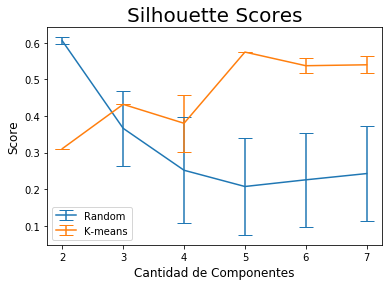

In [9]:
data_prueba = data[0][1][['R','G','B']]

cantidad_componentes=np.arange(2, 8)
sils=[]
errores=[]
iterations=20
for n in cantidad_componentes:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, init_params='random', n_init=2).fit(data_prueba) 
        labels=gmm.predict(data_prueba)
        sil=silhouette_score(data_prueba, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    errores.append(err)

plt.errorbar(cantidad_componentes, sils, yerr=errores, capsize=7)


cantidad_componentes=np.arange(2, 8)
sils=[]
errores=[]
iterations=20
for n in cantidad_componentes:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, init_params='kmeans',  n_init=2).fit(data_prueba) 
        labels=gmm.predict(data_prueba)
        sil=silhouette_score(data_prueba, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    errores.append(err)

plt.errorbar(cantidad_componentes, sils, yerr=errores,capsize=7)


plt.title("Silhouette Scores", fontsize=20)
plt.xticks(cantidad_componentes)
plt.xlabel("Cantidad de Componentes",fontsize=12)
plt.ylabel("Score",fontsize=12)
plt.legend(['Random','K-means'], loc='lower left')
plt.savefig('Resultados/GMM/Silhouette_Scores.png', bbox_inches='tight')